In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
data = pd.read_csv("Covid Data.csv")  ## 97 and 99 are missing data
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [4]:
data.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [5]:
## pregnant
len(data[data["PREGNANT"] == 97]), len(data)

(523511, 1048575)

In [6]:
doksan_yedi = (data[data["PREGNANT"] != 97])
doksan_yedi["PREGNANT"].mean(), type(doksan_yedi)

(2.670876312220986, pandas.core.frame.DataFrame)

In [7]:
d = {97 : 2.67}
eksik = data[data["PREGNANT"] == 97]
eksik["PREGNANT"] = eksik["PREGNANT"].map(d)
type(eksik)

pandas.core.frame.DataFrame

In [8]:
eksik.sample(5)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
124278,1,4,2,1,9999-99-99,97,2,25,2.67,2,2,2,2,2,2,2,2,2,2,3,97
374195,2,6,2,1,9999-99-99,97,2,37,2.67,2,2,2,2,2,2,2,2,2,2,7,97
798671,2,12,2,1,9999-99-99,97,2,19,2.67,2,2,2,2,2,2,2,2,2,2,7,97
712178,1,12,2,1,9999-99-99,97,2,66,2.67,2,2,2,2,2,2,2,2,2,2,6,97
878,1,3,2,2,08/06/2020,2,2,73,2.67,1,2,2,2,1,2,2,2,1,2,3,2


In [9]:
df1 = pd.concat([doksan_yedi, eksik], axis = 0)
df1.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2.0,2,2,2,2,1,2,2,2,2,2,3,97
3,2,1,1,1,12/06/2020,97,2,53,2.0,2,2,2,2,2,2,2,2,2,2,7,97
5,2,1,1,2,9999-99-99,2,1,40,2.0,2,2,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2.0,2,2,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2.0,1,2,2,1,1,2,2,2,1,2,3,97


In [10]:
data.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [11]:
data = data.drop("PREGNANT", axis = 1)

In [12]:
dolu1 = (data[data["PNEUMONIA"] != 97])
dolu1["PNEUMONIA"].mean(), type(dolu1)

(3.3468306988055216, pandas.core.frame.DataFrame)

In [13]:
d = {97 : 3.34, 99 : 3.35}
bos1 = data[data["PNEUMONIA"] == 97]
bos1["PNEUMONIA"] = bos1["PNEUMONIA"].map(d)
type(bos1)

pandas.core.frame.DataFrame

In [14]:
df2 = pd.concat([dolu1, bos1], axis = 0)
df2.sample(5)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
641516,2,12,1,1,9999-99-99,97,2.0,18,2,2,2,2,2,2,2,2,2,2,3,97
14312,2,3,2,1,9999-99-99,97,2.0,52,2,2,2,2,2,2,2,2,2,2,7,97
916707,2,12,2,1,9999-99-99,97,2.0,37,2,2,2,2,2,2,2,1,2,2,7,97
538146,2,12,1,1,9999-99-99,97,2.0,27,2,2,2,2,2,2,2,1,2,2,3,97
88977,2,4,1,1,9999-99-99,97,2.0,24,2,2,1,2,2,2,2,2,2,2,3,97


In [15]:
data = data.drop("PNEUMONIA", axis = 1)

In [16]:
dolu2 = data[data["INTUBED"] != 97]
dolu2["INTUBED"].mean(), type(dolu2)

(5.383820507821287, pandas.core.frame.DataFrame)

In [17]:
d = {97 : 1.82}
bos2 = data[data["INTUBED"] == 97]
bos2["INTUBED"] = bos2["INTUBED"].map(d)
bos2
## intubed olmadı diğerleri gibi

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,1.82,65,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,1.82,72,2,2,2,2,1,2,2,1,1,2,5,97
3,2,1,1,1,12/06/2020,1.82,53,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,1.82,68,1,2,2,2,1,2,2,2,2,2,3,97
6,2,1,1,1,9999-99-99,1.82,64,2,2,2,2,2,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,1,13,2,1,9999-99-99,1.82,47,1,2,2,2,2,2,2,2,2,2,7,97
1048570,2,13,2,1,9999-99-99,1.82,40,2,2,2,2,2,2,2,2,2,2,7,97
1048572,2,13,2,1,9999-99-99,1.82,55,2,2,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,1.82,28,2,2,2,2,2,2,2,2,2,2,7,97


In [18]:
df3 = pd.concat([dolu2, bos2], axis = 0)
df3.sample(5)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
165559,1,4,2,1,9999-99-99,1.82,21,2,2,2,2,2,2,2,2,2,2,6,97
641990,2,12,1,1,9999-99-99,1.82,52,1,2,2,2,1,2,2,2,2,2,3,97
134530,2,4,2,1,9999-99-99,1.82,50,2,2,2,2,1,2,2,1,2,2,3,97
963576,2,12,2,1,9999-99-99,1.82,41,2,2,2,2,2,2,2,2,2,2,7,97
715157,1,12,1,1,9999-99-99,1.82,58,2,2,2,2,2,2,2,2,2,2,6,97


In [19]:
data = data.drop("INTUBED", axis = 1)

In [20]:
data["INTUBED"] = df3["INTUBED"]
data["PREGNANT"] = df1["PREGNANT"]
data["PNEUMONIA"] = df2["PNEUMONIA"]

In [21]:
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,INTUBED,PREGNANT,PNEUMONIA
0,2,1,1,1,03/05/2020,65,2,2,2,2,1,2,2,2,2,2,3,97,1.82,2.00,1.0
1,2,1,2,1,03/06/2020,72,2,2,2,2,1,2,2,1,1,2,5,97,1.82,2.67,1.0
2,2,1,2,2,09/06/2020,55,1,2,2,2,2,2,2,2,2,2,3,2,1.00,2.67,2.0
3,2,1,1,1,12/06/2020,53,2,2,2,2,2,2,2,2,2,2,7,97,1.82,2.00,2.0
4,2,1,2,1,21/06/2020,68,1,2,2,2,1,2,2,2,2,2,3,97,1.82,2.67,2.0


In [22]:
data = data.drop(["INTUBED", "ICU"], axis = 1)

In [23]:
data.corr()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,PREGNANT,PNEUMONIA
USMER,1.000000,0.127927,-0.001126,-0.190570,-0.045088,0.014704,0.011030,0.010814,0.003234,0.014830,-0.015763,0.010097,0.014567,0.011527,0.010638,0.028840,-0.002919,-0.154950
MEDICAL_UNIT,0.127927,1.000000,0.001475,-0.205413,-0.082223,0.019523,0.014209,0.013312,0.011785,0.020964,0.027453,0.014406,0.019577,0.014751,0.012282,0.079981,0.031832,-0.046433
SEX,-0.001126,0.001475,1.000000,0.089505,0.028367,0.008888,0.009372,0.010415,0.007999,0.009257,0.009039,0.008174,0.009858,0.008249,0.004919,-0.057782,-0.000077,-0.012131
PATIENT_TYPE,-0.190570,-0.205413,0.089505,1.000000,0.315193,0.008743,0.019548,0.023042,0.024924,0.006852,0.036724,0.022175,0.019650,0.018873,0.022123,-0.183370,-0.004267,0.022966
AGE,-0.045088,-0.082223,0.028367,0.315193,1.000000,0.004422,0.019048,0.022715,0.022820,-0.004964,0.022837,0.019489,0.015500,0.020124,0.021263,-0.152637,-0.007496,-0.073127
DIABETES,0.014704,0.019523,0.008888,0.008743,0.004422,1.000000,0.828823,0.829349,0.781108,0.835018,0.634611,0.809417,0.752739,0.812657,0.771763,-0.004739,0.048833,-0.004484
COPD,0.011030,0.014209,0.009372,0.019548,0.019048,0.828823,1.000000,0.908929,0.852273,0.855249,0.687323,0.880097,0.814868,0.884032,0.836097,-0.010336,0.053376,-0.005618
ASTHMA,0.010814,0.013312,0.010415,0.023042,0.022715,0.829349,0.908929,1.000000,0.868917,0.864264,0.696709,0.891026,0.824631,0.895050,0.845067,-0.011178,0.053321,-0.005392
INMSUPR,0.003234,0.011785,0.007999,0.024924,0.022820,0.781108,0.852273,0.868917,1.000000,0.825158,0.734826,0.853365,0.783953,0.852755,0.806749,-0.009412,0.052478,-0.000802
HIPERTENSION,0.014830,0.020964,0.009257,0.006852,-0.004964,0.835018,0.855249,0.864264,0.825158,1.000000,0.671532,0.861063,0.805127,0.860477,0.816539,-0.006020,0.050999,-0.004799


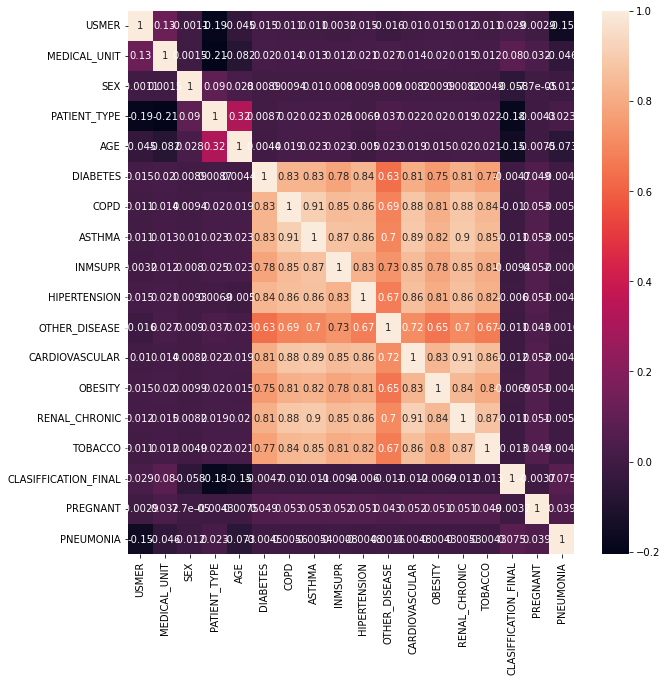

In [24]:
plt.figure(figsize = (10, 10))
sbn.heatmap(data.corr(), annot = True);

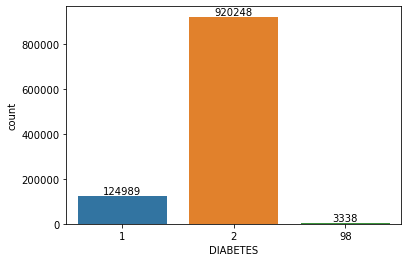

In [25]:
ax = sbn.countplot(x = data["DIABETES"]);
ax.bar_label(ax.containers[0]);

In [26]:
data.sample(2)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,PREGNANT,PNEUMONIA
837900,2,12,1,1,9999-99-99,42,2,2,2,2,2,2,2,2,2,2,7,2.00,2.0
775155,1,12,2,2,9999-99-99,17,2,2,2,2,1,2,2,1,2,2,7,2.67,1.0


In [27]:
#data["DATE_DIED"] = pd.to_datetime(data["DATE_DIED"])

In [28]:
d1 = {"9999-99-99" : 0}
dokuz_tarih = data[data["DATE_DIED"] == "9999-99-99"]

In [29]:
dokuz_tarih["DATE_DIED"] = dokuz_tarih["DATE_DIED"].map(d1)

In [30]:
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,PREGNANT,PNEUMONIA
0,2,1,1,1,03/05/2020,65,2,2,2,2,1,2,2,2,2,2,3,2.00,1.0
1,2,1,2,1,03/06/2020,72,2,2,2,2,1,2,2,1,1,2,5,2.67,1.0
2,2,1,2,2,09/06/2020,55,1,2,2,2,2,2,2,2,2,2,3,2.67,2.0
3,2,1,1,1,12/06/2020,53,2,2,2,2,2,2,2,2,2,2,7,2.00,2.0
4,2,1,2,1,21/06/2020,68,1,2,2,2,1,2,2,2,2,2,3,2.67,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,40,2,2,2,2,2,2,2,2,2,2,7,2.67,2.0
1048571,1,13,2,2,9999-99-99,51,2,2,2,2,1,2,2,2,2,2,7,2.67,2.0
1048572,2,13,2,1,9999-99-99,55,2,2,2,2,2,2,2,2,2,2,7,2.67,2.0
1048573,2,13,2,1,9999-99-99,28,2,2,2,2,2,2,2,2,2,2,7,2.67,2.0


In [31]:
dokuz_tarih

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,PREGNANT,PNEUMONIA
5,2,1,1,2,0,40,2,2,2,2,2,2,2,2,2,2,3,2.00,1.0
6,2,1,1,1,0,64,2,2,2,2,2,2,2,2,2,2,3,2.00,2.0
7,2,1,1,1,0,64,1,2,2,1,1,2,2,2,1,2,3,2.00,1.0
8,2,1,1,2,0,37,1,2,2,2,1,2,2,1,2,2,3,2.00,2.0
9,2,1,1,2,0,25,2,2,2,2,2,2,2,2,2,2,3,2.00,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,0,40,2,2,2,2,2,2,2,2,2,2,7,2.67,2.0
1048571,1,13,2,2,0,51,2,2,2,2,1,2,2,2,2,2,7,2.67,2.0
1048572,2,13,2,1,0,55,2,2,2,2,2,2,2,2,2,2,7,2.67,2.0
1048573,2,13,2,1,0,28,2,2,2,2,2,2,2,2,2,2,7,2.67,2.0


In [32]:
data[data["DATE_DIED"] == "9999-99-99"] = dokuz_tarih

In [33]:
bir_tarih = data[data["DATE_DIED"] != 0]

In [34]:
bir_tarih["DATE_DIED"] = 1

In [35]:
bir_tarih["DATE_DIED"]

0          1
1          1
2          1
3          1
4          1
          ..
1047635    1
1047636    1
1047637    1
1047638    1
1047639    1
Name: DATE_DIED, Length: 76942, dtype: int64

In [36]:
data[data["DATE_DIED"] != 0] = bir_tarih

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   USMER                 1048575 non-null  int64  
 1   MEDICAL_UNIT          1048575 non-null  int64  
 2   SEX                   1048575 non-null  int64  
 3   PATIENT_TYPE          1048575 non-null  int64  
 4   DATE_DIED             1048575 non-null  object 
 5   AGE                   1048575 non-null  int64  
 6   DIABETES              1048575 non-null  int64  
 7   COPD                  1048575 non-null  int64  
 8   ASTHMA                1048575 non-null  int64  
 9   INMSUPR               1048575 non-null  int64  
 10  HIPERTENSION          1048575 non-null  int64  
 11  OTHER_DISEASE         1048575 non-null  int64  
 12  CARDIOVASCULAR        1048575 non-null  int64  
 13  OBESITY               1048575 non-null  int64  
 14  RENAL_CHRONIC         1048575 non-

In [38]:
y = data["DATE_DIED"].astype("int")
x = data.drop("DATE_DIED", axis = 1)


In [39]:
def classification(x, y):
    lr = LogisticRegression()
    br = BernoulliNB()
    gs = GaussianNB()
    kn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    sv = SVC()
    
    models = [lr, br, gs, kn, dt, rf, sv]
    model_names = ["Logistic", "Bernoulli", "Gaussian", "KNN", "Decision", "Random", "SVC"]
    
    x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)
    #x_train = MinMaxScaler().fit_transform(x_train)
    #x_test = MinMaxScaler().fit_transform(x_test)
    #x_train = StandardScaler().fit_transform(x_train)
    #x_test = StandardScaler().fit_transform(x_test)
    
    accuracy = []
    result = pd.DataFrame(columns = ["Accuracy"], index = model_names)
    
    for i in models:
        y_pred = i.fit(x_train, y_train).predict(x_test)
        accuracy.append(accuracy_score(y_true, y_pred))
        
    result["Accuracy"] = accuracy
    
    return result.sort_values("Accuracy", ascending = False)
    

In [40]:
x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
accuracy_score(y_true, y_pred)  # veri büyük oldugu için zorlanıyor olabilir. Alttaki kod uzun bir sure çalışıyor olarak gözüküyor.(classification(x, y))

0.931588107669933